In [1]:
import numpy, scipy, matplotlib.pyplot as plt, urllib, IPython.display
plt.rcParams['figure.figsize'] = (14,5)

[&larr; Back to Index](index.html)

# Zero Crossing Rate

The [zero crossing rate](https://en.wikipedia.org/wiki/Zero-crossing_rate) indicates the number of times that a signal crosses the horizontal axis.

Let's load a signal:

In [2]:
x, fs = librosa.load('simple_loop.wav')

Listen to the signal:

In [3]:
IPython.display.Audio(x, rate=fs)

Plot the signal:

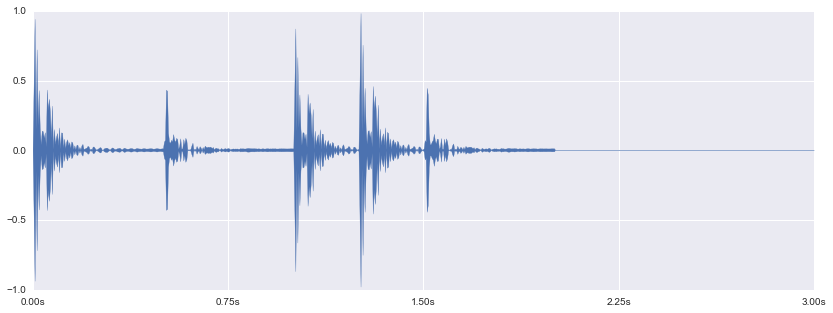

In [4]:
librosa.display.waveplot(x, sr=fs)

Let's zoom in:

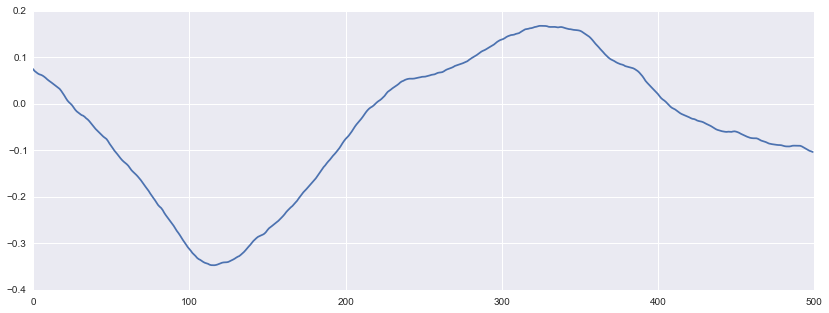

In [5]:
plt.plot(x[1500:2000])

I count three zero crossings. Let's compute the zero crossings using librosa.

In [6]:
zero_crossings = librosa.zero_crossings(x[1500:2000], pad=False)

That computed each individual zero crossing. To find the total number of zero crossings, use `sum`:

In [7]:
print sum(zero_crossings)

3


To find the zero-crossing *rate* over time, use `zero_crossing_rate`:

In [8]:
zcrs = librosa.feature.zero_crossing_rate(x)
print zcrs.shape

(1, 130)


Plot the zero-crossing rate:

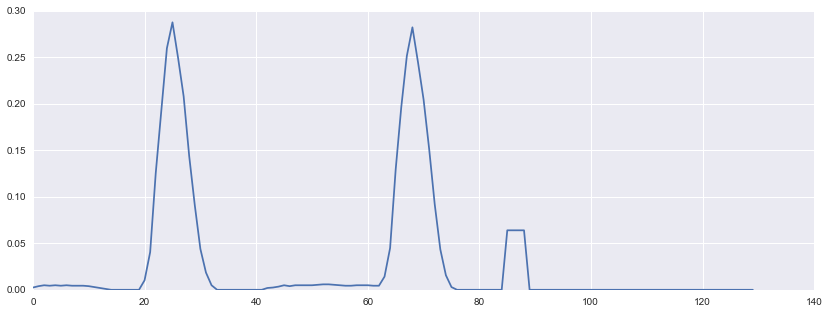

In [9]:
plt.plot(zcrs[0])

[&larr; Back to Index](index.html)